In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import re

In [20]:
f1 = pd.read_csv('/home/dev/work_main/2025/OpenPIM/results/m_mlp/16TR_C22Nc4CD_CL_E20Ne1CD_20250331_16L/fft_1/PIM_B_68_F_10_S_0_M_M_MLP_H_8_P_12400.csv')
f0 = pd.read_csv('/home/dev/work_main/2025/OpenPIM/results/m_mlp/16TR_C22Nc4CD_CL_E20Ne1CD_20250331_16L/fft_0/PIM_B_68_F_10_S_0_M_M_MLP_H_8_P_12400.csv')




def safe_eval_dict(x):
    if pd.isna(x) or x is None:
        return {}
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            # Use eval to handle np.float64() calls
            return eval(x)
        except Exception as e:
            print(f"Could not parse: {x}, Error: {e}")
            return {}
    return {}


f1['TEST_REDUCTION_LEVEL'] = f1['TEST_REDUCTION_LEVEL'].apply(safe_eval_dict)
f0['TEST_REDUCTION_LEVEL'] = f0['TEST_REDUCTION_LEVEL'].apply(safe_eval_dict)

In [23]:
f1['average']= f1['TEST_REDUCTION_LEVEL'].apply(lambda x: np.mean(list(x.values())))
f0['average']= f0['TEST_REDUCTION_LEVEL'].apply(lambda x: np.mean(list(x.values())))

In [25]:
f1

,iteration,n_iterations,TIME:,LR,N_PARAM,TRAIN_LOSS,VAL_LOSS,TEST_LOSS,TEST_NMSE,TEST_REDUCTION_LEVEL,average
0,10000,10000,11.867996,0.01,12400,0.001177,0.001177,0.000545,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
1,20000,20000,23.696060,0.01,12400,0.000652,0.000652,0.000587,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
2,30000,30000,35.507917,0.01,12400,0.000477,0.000477,0.000521,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
3,40000,40000,47.571284,0.01,12400,0.000388,0.000388,0.000510,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
4,50000,50000,59.136188,0.01,12400,0.000335,0.000335,0.000504,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
5,60000,60000,70.860623,0.01,12400,0.000300,0.000300,0.000513,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
6,70000,70000,82.724921,0.01,12400,0.000274,0.000274,0.000518,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
7,80000,80000,94.654025,0.01,12400,0.000255,0.000255,0.000505,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
8,90000,90000,106.321895,0.01,12400,0.000241,0.000241,0.000507,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841
9,100000,100000,118.339614,0.01,12400,0.000229,0.000229,0.000504,"{'CH_0': np.float32(-10.671786), 'CH_1': np.fl...","{'CH_0': 20.92178303878886, 'CH_1': 18.7370677...",19.665841


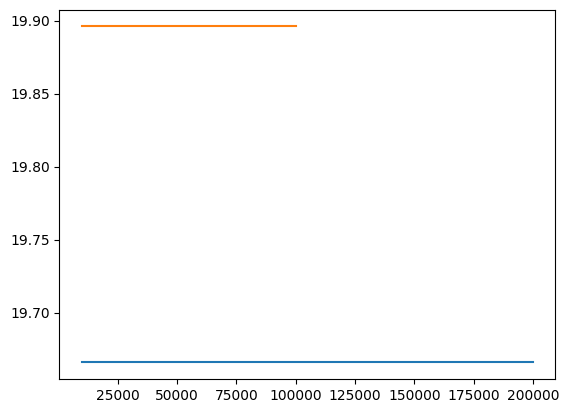

In [29]:
plt.plot(f1['iteration'],f1['average'])
plt.plot(f0['iteration'], f0['average'])

In [30]:
f1['average']

0     19.665841
1     19.665841
2     19.665841
3     19.665841
4     19.665841
5     19.665841
6     19.665841
7     19.665841
8     19.665841
9     19.665841
10    19.665841
11    19.665841
12    19.665841
13    19.665841
14    19.665841
15    19.665841
16    19.665841
17    19.665841
18    19.665841
19    19.665841
Name: average, dtype: float64

In [31]:
f0['average']

0    19.896017
1    19.896017
2    19.896017
3    19.896017
4    19.896017
5    19.896017
6    19.896017
7    19.896017
8    19.896017
9    19.896017
Name: average, dtype: float64

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def quantize_vector(v, num_bits):
    """
    Uniform quantization of vector v to num_bits per element.
    """
    if num_bits <= 0:
        raise ValueError("num_bits must be positive")
    # Determine the range of the vector
    v_min, v_max = v.min(), v.max()
    if v_max == v_min:
        # Avoid division by zero; return zeros if all elements are the same
        return np.zeros_like(v)
    # Compute the number of quantization levels
    levels = 2 ** num_bits
    # Scale to [0, levels-1], round, then scale back to [v_min, v_max]
    v_scaled = (v - v_min) / (v_max - v_min) * (levels - 1)
    v_quantized = np.round(v_scaled)
    v_rescaled = v_quantized / (levels - 1) * (v_max - v_min) + v_min
    return v_rescaled

def sparsify_vector(v, sparsity):
    """
    Sparsify vector v by keeping the top (1-sparsity) fraction of elements by magnitude.
    """
    if not (0 <= sparsity <= 1):
        raise ValueError("sparsity must be between 0 and 1")
    if sparsity == 1.0:
        return np.zeros_like(v)
    k = int((1 - sparsity) * len(v))
    if k == 0:
        return np.zeros_like(v)
    # Find indices of the top k elements by absolute value
    indices = np.argpartition(np.abs(v), -k)[-k:]
    v_sparse = np.zeros_like(v)
    v_sparse[indices] = v[indices]
    return v_sparse

def cosine_similarity(v1, v2):
    """
    Compute cosine similarity between two vectors.
    """
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return np.dot(v1, v2) / (norm1 * norm2)



In [56]:
# Parameters
np.random.seed(42)  # For reproducibility
num_vectors = 10000
dim = int(128/4)

# Generate Gaussian vectors
#vectors = np.random.randn(num_vectors, dim)


b = 1 / np.sqrt(1)
vectors = np.random.laplace(loc=0.0, scale=b, size=(num_vectors, dim))


# Define sparsity levels and quantization bits to test
sparsity_levels = [0.2,0.3, 0.5, 0.7, 0.9]  # 0%, 50%, 70%, 90% sparsity
quantization_bits = [16,8,4,2,1]      # 2-bit, 4-bit, 8-bit, 16-bit

# Containers for results
sparsity_cosines = {s: [] for s in sparsity_levels}
quantization_cosines = {b: [] for b in quantization_bits}

# Process each vector
for v in vectors:
    # Test sparsification (with no quantization, i.e., full precision)
    for s in sparsity_levels:
        v_sparse = sparsify_vector(v, s)
        cos_sim = cosine_similarity(v, v_sparse)
        sparsity_cosines[s].append(cos_sim)
    
    # Test quantization (with no sparsification, i.e., sparsity=0.0)
    for b in quantization_bits:
        v_quant = quantize_vector(v, b)
        cos_sim = cosine_similarity(v, v_quant)
        quantization_cosines[b].append(cos_sim)

# Convert lists to numpy arrays for easier statistics
for s in sparsity_levels:
    sparsity_cosines[s] = np.array(sparsity_cosines[s])
for b in quantization_bits:
    quantization_cosines[b] = np.array(quantization_cosines[b])


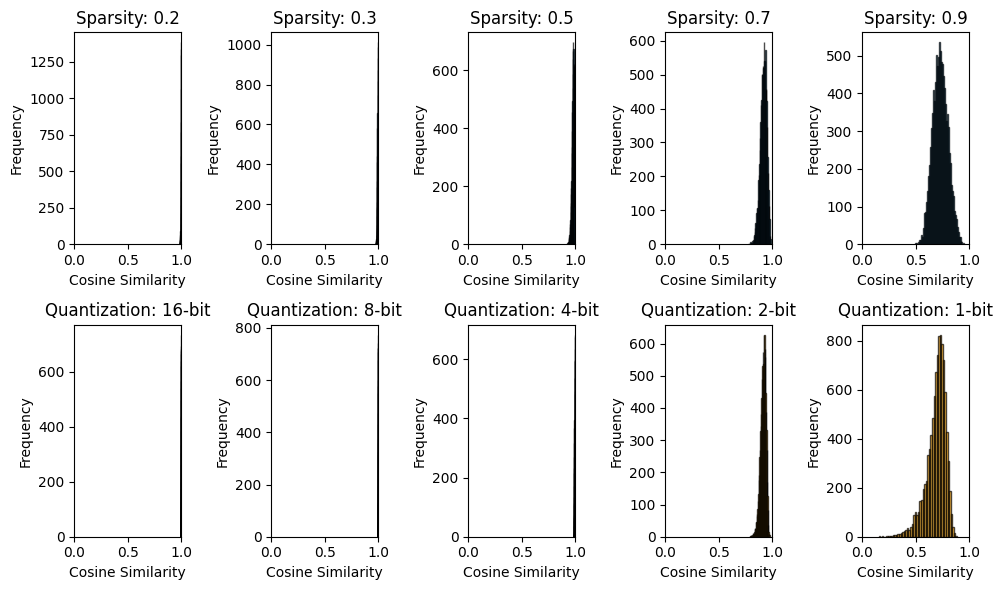

In [60]:

# Plot histograms
fig, axes = plt.subplots(2, len(sparsity_levels), figsize=(10, 6))

# Sparsity histograms
for i, s in enumerate(sparsity_levels):
    ax = axes[0, i] if len(sparsity_levels) <= 2 else axes[0, i]
    ax.hist(sparsity_cosines[s], bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f'Sparsity: {s:.1f}')
    ax.set_xlabel('Cosine Similarity')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)

# Quantization histograms
for i, b in enumerate(quantization_bits):
    ax = axes[1, i] if len(quantization_bits) <= 2 else axes[1, i]
    ax.hist(quantization_cosines[b], bins=50, alpha=0.7, edgecolor='black', color='orange')
    ax.set_title(f'Quantization: {b}-bit')
    ax.set_xlabel('Cosine Similarity')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

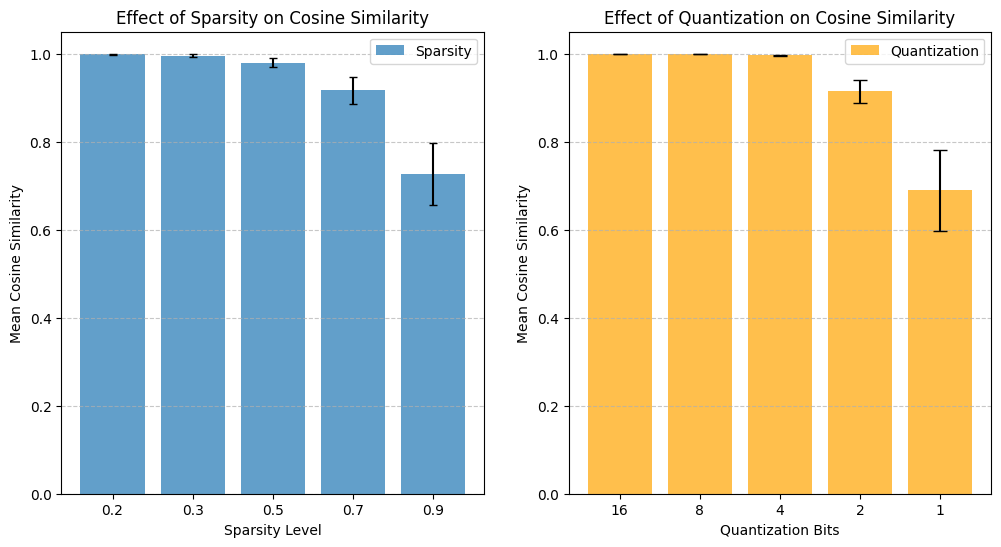

In [59]:
# Prepare data for bar plots
sparsity_means = [sparsity_cosines[s].mean() for s in sparsity_levels]
sparsity_stds = [sparsity_cosines[s].std() for s in sparsity_levels]

quantization_means = [quantization_cosines[b].mean() for b in quantization_bits]
quantization_stds = [quantization_cosines[b].std() for b in quantization_bits]

# Bar plot for sparsity
fig, axes = plt.subplots(1,2, figsize=(12, 6))
x_sparsity = np.arange(len(sparsity_levels))
axes[0].bar(x_sparsity, sparsity_means, yerr=sparsity_stds, capsize=3, alpha=0.7, label='Sparsity')
axes[0].set_xlabel('Sparsity Level')
axes[0].set_ylabel('Mean Cosine Similarity')
axes[0].set_title('Effect of Sparsity on Cosine Similarity')
axes[0].set_xticks(x_sparsity, sparsity_levels)
#axes[0].ylim(0, 1)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

# Bar plot for quantization
#plt.figure(figsize=(10, 6))
x_quant = np.arange(len(quantization_bits))
axes[1].bar(x_quant, quantization_means, yerr=quantization_stds, capsize=5, alpha=0.7, color='orange', label='Quantization')
axes[1].set_xlabel('Quantization Bits')
axes[1].set_ylabel('Mean Cosine Similarity')
axes[1].set_title('Effect of Quantization on Cosine Similarity')
axes[1].set_xticks(x_quant, quantization_bits)
#axes[1].ylim(0, 1)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

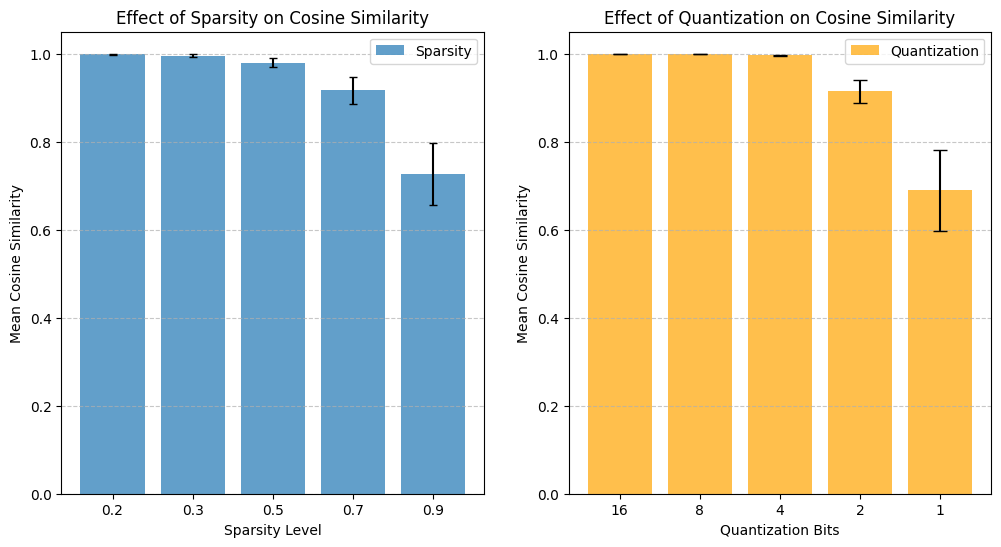

In [58]:
# Prepare data for bar plots
sparsity_means = [sparsity_cosines[s].mean() for s in sparsity_levels]
sparsity_stds = [sparsity_cosines[s].std() for s in sparsity_levels]

quantization_means = [quantization_cosines[b].mean() for b in quantization_bits]
quantization_stds = [quantization_cosines[b].std() for b in quantization_bits]

# Bar plot for sparsity
fig, axes = plt.subplots(1,2, figsize=(12, 6))
x_sparsity = np.arange(len(sparsity_levels))
axes[0].bar(x_sparsity, sparsity_means, yerr=sparsity_stds, capsize=3, alpha=0.7, label='Sparsity')
axes[0].set_xlabel('Sparsity Level')
axes[0].set_ylabel('Mean Cosine Similarity')
axes[0].set_title('Effect of Sparsity on Cosine Similarity')
axes[0].set_xticks(x_sparsity, sparsity_levels)
#axes[0].ylim(0, 1)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)#plt.show()

# Bar plot for quantization
#plt.figure(figsize=(10, 6))
x_quant = np.arange(len(quantization_bits))
axes[1].bar(x_quant, quantization_means, yerr=quantization_stds, capsize=5, alpha=0.7, color='orange', label='Quantization')
axes[1].set_xlabel('Quantization Bits')
axes[1].set_ylabel('Mean Cosine Similarity')
axes[1].set_title('Effect of Quantization on Cosine Similarity')
axes[1].set_xticks(x_quant, quantization_bits)
#axes[1].ylim(0, 1)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
estimate_effective_bits_sparsity(100,0.7)
estimate_effective_bits_quantization(100, 2)

np.float64(1012.1089678249862)

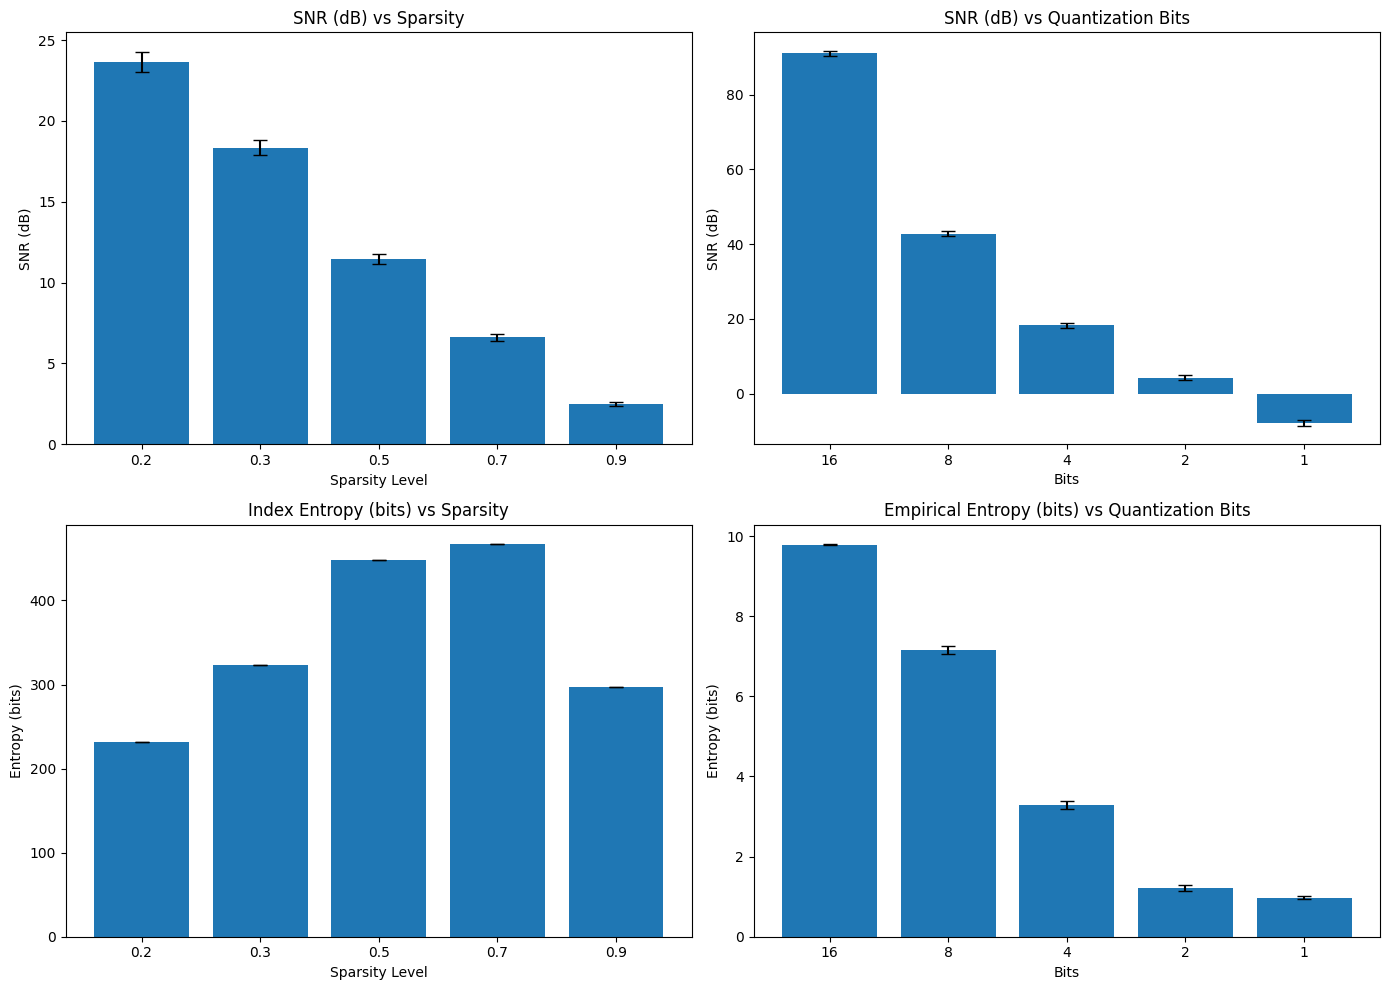

Mean SNR (dB) for sparsity levels: {0.2: np.float64(23.63674400355317), 0.3: np.float64(18.34044304746914), 0.5: np.float64(11.448772987635458), 0.7: np.float64(6.609145623570196), 0.9: np.float64(2.4931850657901284)}
Mean SNR (dB) for quantization bits: {16: np.float64(91.0323352682803), 8: np.float64(42.83762144891867), 4: np.float64(18.224768099683075), 2: np.float64(4.183607172782104), 1: np.float64(-7.777611179438971)}
Mean Index Entropy (bits) for sparsity: {0.2: np.float64(231.65402767203702), 0.3: np.float64(322.9258723632393), 0.5: np.float64(448.0), 0.7: np.float64(466.65921606875503), 0.9: np.float64(296.5143127071174)}
Mean Empirical Entropy (bits) for quantization: {16: np.float64(9.78291601224987), 8: np.float64(7.161717297554756), 4: np.float64(3.2779036482101365), 2: np.float64(1.211013172026095), 1: np.float64(0.9734646318628678)}


In [67]:
import numpy as np
import matplotlib.pyplot as plt

def snr_db_batch(original, reconstructed):
    """Batch SNR in dB."""
    signal_power = np.sum(original ** 2, axis=1)
    noise_power = np.sum((original - reconstructed) ** 2, axis=1)
    snr = np.full_like(signal_power, np.inf)
    valid = (noise_power > 0) & (signal_power > 0)
    snr[valid] = 10 * np.log10(signal_power[valid] / noise_power[valid])
    snr[noise_power == 0] = np.inf
    snr[signal_power == 0] = -np.inf
    return snr

def apply_sparsity(vectors, sparsity):
    """Apply magnitude-based sparsity (keep top 1-sparsity fraction)."""
    k = int(vectors.shape[1] * (1 - sparsity))
    if k == 0:
        return np.zeros_like(vectors)
    # Get indices of top-k absolute values per row
    idx = np.argpartition(np.abs(vectors), -k, axis=1)[:, -k:]
    sparse = np.zeros_like(vectors)
    rows = np.arange(vectors.shape[0])[:, None]
    sparse[rows, idx] = vectors[rows, idx]
    return sparse

def quantize_vector(vectors, num_bits):
    """Uniform quantization to 2**num_bits levels."""
    if num_bits <= 0:
        return np.zeros_like(vectors)
    levels = 2 ** num_bits
    # Use dynamic range per vector (min/max)
    vmin = np.min(vectors, axis=1, keepdims=True)
    vmax = np.max(vectors, axis=1, keepdims=True)
    # Avoid division by zero
    range_ = vmax - vmin
    range_[range_ == 0] = 1.0
    # Normalize to [0, 1]
    normalized = (vectors - vmin) / range_
    # Quantize
    quantized_norm = np.round(normalized * (levels - 1)) / (levels - 1)
    # Denormalize
    quantized = vmin + quantized_norm * range_
    return quantized

def entropy_of_quantized(vectors, num_bits):
    """Estimate empirical entropy (in bits) of quantized vectors.
    Assumes uniform quantization with 2**num_bits levels.
    Returns average entropy per vector (total entropy)."""
    if num_bits <= 0:
        return np.array([0.0] * vectors.shape[0])
    levels = 2 ** num_bits
    vmin = np.min(vectors, axis=1, keepdims=True)
    vmax = np.max(vectors, axis=1, keepdims=True)
    range_ = vmax - vmin
    range_[range_ == 0] = 1.0
    normalized = (vectors - vmin) / range_
    quantized_indices = np.round(normalized * (levels - 1)).astype(int)
    quantized_indices = np.clip(quantized_indices, 0, levels - 1)
    
    entropies = []
    for i in range(vectors.shape[0]):
        # Count frequency of each level
        counts = np.bincount(quantized_indices[i], minlength=levels)
        probs = counts / vectors.shape[1]
        # Remove zero probabilities
        probs = probs[probs > 0]
        if len(probs) == 0:
            ent = 0.0
        else:
            ent = -np.sum(probs * np.log2(probs))
        entropies.append(ent)
    return np.array(entropies)

def entropy_of_sparse(vectors, sparsity):
    """Estimate effective entropy of sparse vectors.
    Includes index entropy + value entropy (assuming values are continuous -> high entropy).
    For simplicity, we only compute index entropy (combinatorial), assuming values are unique."""
    N = vectors.shape[1]
    k = int(N * (1 - sparsity))
    if k == 0:
        return np.array([0.0] * vectors.shape[0])
    # Index entropy per vector: log2(C(N, k)) ≈ k * log2(N / k)  (for k << N)
    # We use the approximation
    index_entropy = k * np.log2(N / k) if k > 0 else 0.0
    # Since values are real and unique, their entropy is high and similar across vectors,
    # so we focus on index entropy as the variable part.
    return np.full(vectors.shape[0], index_entropy)

# Parameters
np.random.seed(42)
num_vectors = 1000
dim = 128*7

vectors = np.random.randn(num_vectors, dim)

# b = 1.0 / np.sqrt(2)  # Laplace scale for unit variance (Var = 2b^2 => b=1/sqrt(2))
# vectors = np.random.laplace(loc=0.0, scale=b, size=(num_vectors, dim))

sparsity_levels = [0.2, 0.3, 0.5, 0.7, 0.9]
quantization_bits = [16, 8, 4, 2, 1]

# Compute metrics for sparsity
snr_sparse_list = []
entropy_sparse_list = []
for s in sparsity_levels:
    sparse_vecs = apply_sparsity(vectors, s)
    snr_vals = snr_db_batch(vectors, sparse_vecs)
    # Replace inf with large number for plotting
    snr_vals = np.where(np.isinf(snr_vals), 100, snr_vals)
    snr_sparse_list.append(snr_vals)
    ent_vals = entropy_of_sparse(vectors, s)
    entropy_sparse_list.append(ent_vals)

# Compute metrics for quantization
snr_quant_list = []
entropy_quant_list = []
for bwidth in quantization_bits:
    quant_vecs = quantize_vector(vectors, bwidth)
    snr_vals = snr_db_batch(vectors, quant_vecs)
    snr_vals = np.where(np.isinf(snr_vals), 100, snr_vals)
    snr_quant_list.append(snr_vals)
    ent_vals = entropy_of_quantized(vectors, bwidth)
    entropy_quant_list.append(ent_vals)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# SNR vs Sparsity
means_snr_sparse = [np.mean(arr) for arr in snr_sparse_list]
stds_snr_sparse = [np.std(arr) for arr in snr_sparse_list]
axes[0, 0].bar([str(s) for s in sparsity_levels], means_snr_sparse, yerr=stds_snr_sparse, capsize=5)
axes[0, 0].set_title('SNR (dB) vs Sparsity')
axes[0, 0].set_xlabel('Sparsity Level')
axes[0, 0].set_ylabel('SNR (dB)')

# SNR vs Quantization
means_snr_quant = [np.mean(arr) for arr in snr_quant_list]
stds_snr_quant = [np.std(arr) for arr in snr_quant_list]
axes[0, 1].bar([str(b) for b in quantization_bits], means_snr_quant, yerr=stds_snr_quant, capsize=5)
axes[0, 1].set_title('SNR (dB) vs Quantization Bits')
axes[0, 1].set_xlabel('Bits')
axes[0, 1].set_ylabel('SNR (dB)')

# Entropy vs Sparsity
means_ent_sparse = [np.mean(arr) for arr in entropy_sparse_list]
stds_ent_sparse = [np.std(arr) for arr in entropy_sparse_list]
axes[1, 0].bar([str(s) for s in sparsity_levels], means_ent_sparse, yerr=stds_ent_sparse, capsize=5)
axes[1, 0].set_title('Index Entropy (bits) vs Sparsity')
axes[1, 0].set_xlabel('Sparsity Level')
axes[1, 0].set_ylabel('Entropy (bits)')

# Entropy vs Quantization
means_ent_quant = [np.mean(arr) for arr in entropy_quant_list]
stds_ent_quant = [np.std(arr) for arr in entropy_quant_list]
axes[1, 1].bar([str(b) for b in quantization_bits], means_ent_quant, yerr=stds_ent_quant, capsize=5)
axes[1, 1].set_title('Empirical Entropy (bits) vs Quantization Bits')
axes[1, 1].set_xlabel('Bits')
axes[1, 1].set_ylabel('Entropy (bits)')

plt.tight_layout()
plt.show()

# Optional: Print mean values
print("Mean SNR (dB) for sparsity levels:", dict(zip(sparsity_levels, means_snr_sparse)))
print("Mean SNR (dB) for quantization bits:", dict(zip(quantization_bits, means_snr_quant)))
print("Mean Index Entropy (bits) for sparsity:", dict(zip(sparsity_levels, means_ent_sparse)))
print("Mean Empirical Entropy (bits) for quantization:", dict(zip(quantization_bits, means_ent_quant)))

In [62]:
def estimate_effective_bits_sparsity(N, sparsity, val_bits=32):
    k = int(N * (1 - sparsity))
    if k == 0:
        return 0
    # Index cost: log2(choose(N, k)) ≈ k * log2(N / k)
    index_bits = k * np.log2(N / k) if k > 0 else 0
    value_bits = k * val_bits  # assuming full precision for non-zeros
    return index_bits + value_bits

def estimate_effective_bits_quantization(N, num_bits):
    return N * num_bits



In [74]:
import numpy as np
import math

def log2_representation_capacity(N, method='quantization', bits=16, sparsity=0.0):
    """
    Compute log2 of the number of distinct representable vectors for a given method.
    
    Parameters:
    - N: vector dimension
    - method: 'quantization' or 'sparsification'
    - bits: number of bits per element (for quantization) or for non-zero values (for sparsification)
    - sparsity: fraction of zeros (0.0 = dense, 0.9 = 90% zeros)
    
    Returns:
    - log2_capacity: log2 of total number of distinct vectors representable
    """
    if method == 'quantization':
        # Each of N elements can take 2^bits values
        # Total combinations = (2^bits)^N = 2^(bits * N)
        # So log2(capacity) = bits * N
        return bits * N
    
    elif method == 'sparsification':
        # Number of non-zero elements
        k = int(N * (1 - sparsity))
        if k == 0:
            return 0.0  # Only the zero vector
        
        # Number of ways to choose k positions out of N
        # log2(C(N, k)) ≈ k * log2(N/k) + k (using Stirling approx)
        # But we can compute exactly using log gamma for stability
        # log2(C(N, k)) = log2(N!) - log2(k!) - log2((N-k)!)
        log2_combinations = (math.lgamma(N + 1) - math.lgamma(k + 1) - math.lgamma(N - k + 1)) / math.log(2)
        
        # For each non-zero position, we have 2^bits possible values
        log2_value_combinations = k * bits
        
        return log2_combinations + log2_value_combinations
    
    else:
        raise ValueError("Method must be 'quantization' or 'sparsification'")

# Test with N=128
N = 64

# Quantization capacities (fixed at 16 bits max, but we'll test lower too)
quant_bits = [16, 8, 4, 2, 1]
quant_capacities = [log2_representation_capacity(N, 'quantization', b) for b in quant_bits]

# Sparsification capacities (with 16-bit non-zero values)
sparsity_levels = [0.0, 0.2, 0.3, 0.5, 0.7, 0.9]
sparse_capacities = [log2_representation_capacity(N, 'sparsification', bits=16, sparsity=s) for s in sparsity_levels]

quant_capacities, sparse_capacities

([1024, 512, 256, 128, 64],
 [1024.0,
  859.578685583946,
  758.1231543959032,
  572.6686166370035,
  356.9532293944608,
  122.15989412009044])

In [73]:
quant_capacities, sparse_capacities

([8192, 4096, 2048, 1024, 512],
 [8192.0,
  6910.315816022855,
  6175.006893561464,
  4603.173547494774,
  2893.7858400683353,
  1051.4024765237584])

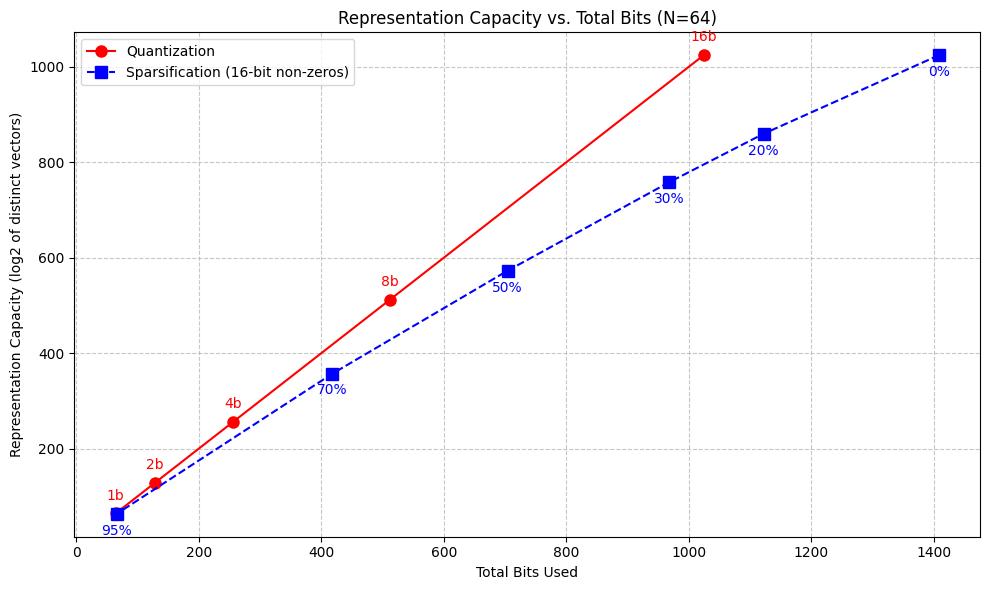

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def log2_representation_capacity(N, method='quantization', bits=16, sparsity=0.0):
    """
    Compute log2 of the number of distinct representable vectors for a given method.
    
    Parameters:
    - N: vector dimension
    - method: 'quantization' or 'sparsification'
    - bits: number of bits per element (for quantization) or for non-zero values (for sparsification)
    - sparsity: fraction of zeros (0.0 = dense, 0.9 = 90% zeros)
    
    Returns:
    - log2_capacity: log2 of total number of distinct vectors representable
    """
    if method == 'quantization':
        return bits * N
    
    elif method == 'sparsification':
        k = int(N * (1 - sparsity))
        if k == 0:
            return 0.0  # Only the zero vector
        
        # Compute log2(C(N, k)) using log gamma for numerical stability
        from math import lgamma, log
        log2_combinations = (lgamma(N + 1) - lgamma(k + 1) - lgamma(N - k + 1)) / log(2)
        log2_value_combinations = k * bits
        return log2_combinations + log2_value_combinations
    
    else:
        raise ValueError("Method must be 'quantization' or 'sparsification'")

def total_bits_used(N, method='quantization', bits=16, sparsity=0.0):
    """
    Compute total bits used to represent a vector.
    
    Parameters:
    - N: vector dimension
    - method: 'quantization' or 'sparsification'
    - bits: number of bits per element (for quantization) or for non-zero values (for sparsification)
    - sparsity: fraction of zeros (0.0 = dense, 0.9 = 90% zeros)
    
    Returns:
    - total_bits: total number of bits used
    """
    if method == 'quantization':
        return bits * N
    
    elif method == 'sparsification':
        k = int(N * (1 - sparsity))
        if k == 0:
            return 0  # Only the zero vector, no bits needed in theory
        
        # Index bits: we assume naive encoding (each index takes log2(N) bits)
        # In practice, you could use combinatorial indexing, but naive is simpler
        index_bits = k * np.ceil(np.log2(N))
        value_bits = k * bits
        return index_bits + value_bits
    
    else:
        raise ValueError("Method must be 'quantization' or 'sparsification'")

# Parameters
N = 64
quant_bits = [16, 8, 4, 2, 1]
sparsity_levels = [0.0, 0.2, 0.3, 0.5, 0.7, 0.95]

# Compute points for quantization
quant_capacities = []
quant_total_bits = []
for b in quant_bits:
    cap = log2_representation_capacity(N, 'quantization', bits=b)
    bits_used = total_bits_used(N, 'quantization', bits=b)
    quant_capacities.append(cap)
    quant_total_bits.append(bits_used)

# Compute points for sparsification (with 16-bit non-zero values)
sparse_capacities = []
sparse_total_bits = []
for s in sparsity_levels:
    cap = log2_representation_capacity(N, 'sparsification', bits=16, sparsity=s)
    bits_used = total_bits_used(N, 'sparsification', bits=16, sparsity=s)
    sparse_capacities.append(cap)
    sparse_total_bits.append(bits_used)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(quant_total_bits, quant_capacities, 'ro-', label='Quantization', markersize=8)
plt.plot(sparse_total_bits, sparse_capacities, 'bs--', label='Sparsification (16-bit non-zeros)', markersize=8)

# Annotate points
for i, b in enumerate(quant_bits):
    plt.annotate(f'{b}b', (quant_total_bits[i], quant_capacities[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')

for i, s in enumerate(sparsity_levels):
    plt.annotate(f'{int(s*100)}%', (sparse_total_bits[i], sparse_capacities[i]), 
                 textcoords="offset points", xytext=(0,-15), ha='center', color='blue')

plt.xlabel('Total Bits Used')
plt.ylabel('Representation Capacity (log2 of distinct vectors)')
plt.title(f'Representation Capacity vs. Total Bits (N={N})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()